In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,learning_curve, cross_val_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from xgboost import XGBRegressor
import scipy.stats as stats
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import shap
from scipy.special import expit

In [2]:
df = pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\vodka.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
x = df.drop(columns=['quality'])
y = df['quality']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.35, random_state=42)
y_train = y_train - 1
y_test = y_test - 1

In [6]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('xgbr',XGBRegressor(random_state=42))
])

In [7]:
param_dist = {
    'xgbr__n_estimators': [50, 100, 300],
    'xgbr__learning_rate': [0.01, 0.1, 1, 10],
    'xgbr__max_depth' : [5, 12, 20],
    'xgbr__subsample' : [0.3, 0.7, 1.0],
    'xgbr__reg_alpha' : [0.01, 0.1, 1],
    'xgbr__reg_lambda' : [1,5,10],
    'xgbr__gamma' : [0,1,5],
    'xgbr__colsample_bytree': [0.5, 0.7, 1.0],
    'xgbr__min_child_weight':[1,3,5]
}

random_search = HalvingRandomSearchCV(pipeline,
param_distributions=param_dist,
scoring='neg_mean_squared_error',
cv=5,
n_jobs=-1,
verbose =1
)

random_search.fit(x_train, y_train)
print(random_search.best_params_)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 10
max_resources_: 1039
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 103
n_resources: 10
Fitting 5 folds for each of 103 candidates, totalling 515 fits


c:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [-4.49005022e-01 -3.95442541e-01             nan -5.15769544e-01
 -3.68367357e-01 -7.11647778e-01 -8.14152119e-01 -3.85151753e-01
 -5.51396070e-01             nan -4.04649550e-01 -4.91076436e-01
 -3.69885882e-01             nan -4.75789798e-01 -4.55004505e-01
 -5.29380245e-01 -3.68367357e-01 -7.43605202e-01 -3.70261027e-01
 -3.71248192e-01 -3.69107874e+46 -1.06640674e+50 -3.75451141e-01
 -3.68367357e-01 -3.68367357e-01 -3.68367357e-01 -3.76143972e-01
 -7.27997336e-01 -1.06671079e+22             nan -3.68367357e-01
 -3.84116588e-01 -4.12936957e-01 -7.64477450e+64 -4.20150020e-01
             nan -4.41597216e-01 -3.68367357e-01 -3.68367357e-01
 -3.93719183e-01 -5.23074821e-01             nan -3.89733816e-01
 -3.91055758e-01 -3.68367357e-01             nan -7.25773174e-01
             nan -3.70490668e-01 -3.68367357e-

----------
iter: 1
n_candidates: 35
n_resources: 30
Fitting 5 folds for each of 35 candidates, totalling 175 fits


c:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [-4.49005022e-01 -3.95442541e-01             nan -5.15769544e-01
 -3.68367357e-01 -7.11647778e-01 -8.14152119e-01 -3.85151753e-01
 -5.51396070e-01             nan -4.04649550e-01 -4.91076436e-01
 -3.69885882e-01             nan -4.75789798e-01 -4.55004505e-01
 -5.29380245e-01 -3.68367357e-01 -7.43605202e-01 -3.70261027e-01
 -3.71248192e-01 -3.69107874e+46 -1.06640674e+50 -3.75451141e-01
 -3.68367357e-01 -3.68367357e-01 -3.68367357e-01 -3.76143972e-01
 -7.27997336e-01 -1.06671079e+22             nan -3.68367357e-01
 -3.84116588e-01 -4.12936957e-01 -7.64477450e+64 -4.20150020e-01
             nan -4.41597216e-01 -3.68367357e-01 -3.68367357e-01
 -3.93719183e-01 -5.23074821e-01             nan -3.89733816e-01
 -3.91055758e-01 -3.68367357e-01             nan -7.25773174e-01
             nan -3.70490668e-01 -3.68367357e-

----------
iter: 2
n_candidates: 12
n_resources: 90
Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [-4.49005022e-01 -3.95442541e-01             nan -5.15769544e-01
 -3.68367357e-01 -7.11647778e-01 -8.14152119e-01 -3.85151753e-01
 -5.51396070e-01             nan -4.04649550e-01 -4.91076436e-01
 -3.69885882e-01             nan -4.75789798e-01 -4.55004505e-01
 -5.29380245e-01 -3.68367357e-01 -7.43605202e-01 -3.70261027e-01
 -3.71248192e-01 -3.69107874e+46 -1.06640674e+50 -3.75451141e-01
 -3.68367357e-01 -3.68367357e-01 -3.68367357e-01 -3.76143972e-01
 -7.27997336e-01 -1.06671079e+22             nan -3.68367357e-01
 -3.84116588e-01 -4.12936957e-01 -7.64477450e+64 -4.20150020e-01
             nan -4.41597216e-01 -3.68367357e-01 -3.68367357e-01
 -3.93719183e-01 -5.23074821e-01             nan -3.89733816e-01
 -3.91055758e-01 -3.68367357e-01             nan -7.25773174e-01
             nan -3.70490668e-01 -3.68367357e-

----------
iter: 3
n_candidates: 4
n_resources: 270
Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [-4.49005022e-01 -3.95442541e-01             nan -5.15769544e-01
 -3.68367357e-01 -7.11647778e-01 -8.14152119e-01 -3.85151753e-01
 -5.51396070e-01             nan -4.04649550e-01 -4.91076436e-01
 -3.69885882e-01             nan -4.75789798e-01 -4.55004505e-01
 -5.29380245e-01 -3.68367357e-01 -7.43605202e-01 -3.70261027e-01
 -3.71248192e-01 -3.69107874e+46 -1.06640674e+50 -3.75451141e-01
 -3.68367357e-01 -3.68367357e-01 -3.68367357e-01 -3.76143972e-01
 -7.27997336e-01 -1.06671079e+22             nan -3.68367357e-01
 -3.84116588e-01 -4.12936957e-01 -7.64477450e+64 -4.20150020e-01
             nan -4.41597216e-01 -3.68367357e-01 -3.68367357e-01
 -3.93719183e-01 -5.23074821e-01             nan -3.89733816e-01
 -3.91055758e-01 -3.68367357e-01             nan -7.25773174e-01
             nan -3.70490668e-01 -3.68367357e-

----------
iter: 4
n_candidates: 2
n_resources: 810
Fitting 5 folds for each of 2 candidates, totalling 10 fits


c:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [-4.49005022e-01 -3.95442541e-01             nan -5.15769544e-01
 -3.68367357e-01 -7.11647778e-01 -8.14152119e-01 -3.85151753e-01
 -5.51396070e-01             nan -4.04649550e-01 -4.91076436e-01
 -3.69885882e-01             nan -4.75789798e-01 -4.55004505e-01
 -5.29380245e-01 -3.68367357e-01 -7.43605202e-01 -3.70261027e-01
 -3.71248192e-01 -3.69107874e+46 -1.06640674e+50 -3.75451141e-01
 -3.68367357e-01 -3.68367357e-01 -3.68367357e-01 -3.76143972e-01
 -7.27997336e-01 -1.06671079e+22             nan -3.68367357e-01
 -3.84116588e-01 -4.12936957e-01 -7.64477450e+64 -4.20150020e-01
             nan -4.41597216e-01 -3.68367357e-01 -3.68367357e-01
 -3.93719183e-01 -5.23074821e-01             nan -3.89733816e-01
 -3.91055758e-01 -3.68367357e-01             nan -7.25773174e-01
             nan -3.70490668e-01 -3.68367357e-

{'xgbr__subsample': 0.3, 'xgbr__reg_lambda': 5, 'xgbr__reg_alpha': 1, 'xgbr__n_estimators': 100, 'xgbr__min_child_weight': 5, 'xgbr__max_depth': 5, 'xgbr__learning_rate': 0.1, 'xgbr__gamma': 1, 'xgbr__colsample_bytree': 1.0}


In [ ]:
best_model = random_search.best_estimator_

y_pred = best_model.predict(x_test)
print(y_pred)

In [ ]:
proba = expit(y_pred)
print(proba)

In [ ]:
prediksi = pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\vodkapredict.csv")
prediksi.head()

In [ ]:
y_prediksi = best_model.predict(prediksi)
probabilitas_prediksi = expit(y_prediksi)
print(y_prediksi)
print(probabilitas_prediksi)

In [9]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

n = len(y_test)
p = x_test.shape[1]
r2_adj = 1 - ((1-r2) * (n - 1) / (n - p - 1))

print(mse)
print(mae)
print(rmse)
print(r2)
print(r2_adj)

0.40521695042107586
0.5005187869071961
0.6365665325958284
0.3802861869340599
0.3678466760878458


In [ ]:
cv_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

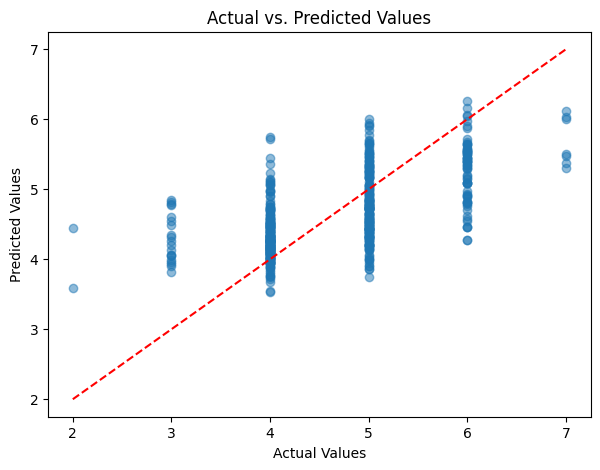

In [10]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

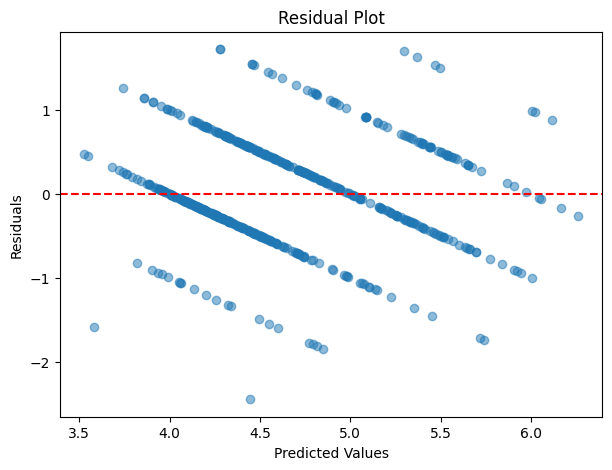

In [11]:
residuals = y_test - y_pred

plt.figure(figsize=(7, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

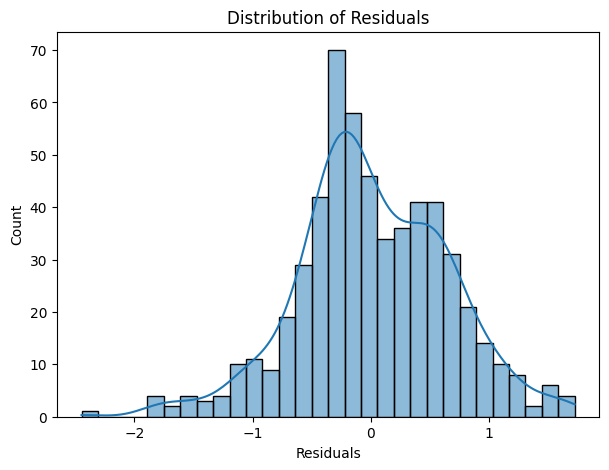

In [12]:
plt.figure(figsize=(7, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

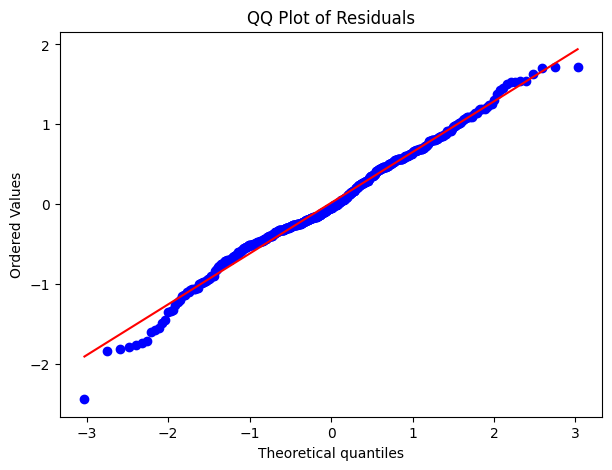

In [13]:
plt.figure(figsize=(7, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

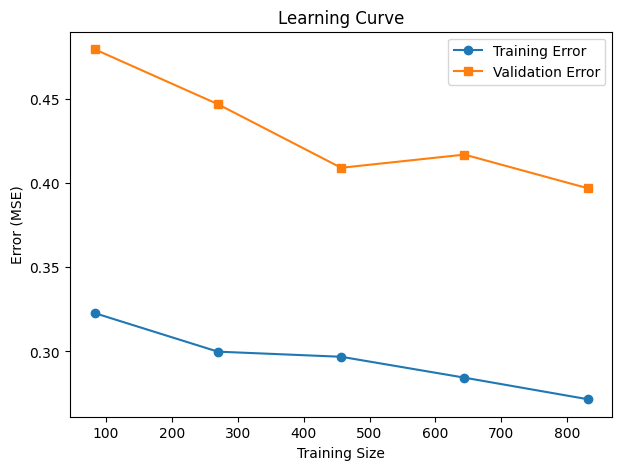

In [14]:
train_sizes, train_scores, test_scores = learning_curve(best_model, x_train, y_train, cv=5, scoring="neg_mean_squared_error")

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(7, 5))
plt.plot(train_sizes, train_mean, label="Training Error", marker="o")
plt.plot(train_sizes, test_mean, label="Validation Error", marker="s")
plt.xlabel("Training Size")
plt.ylabel("Error (MSE)")
plt.legend()
plt.title("Learning Curve")
plt.show()

C:\Users\Robyi\AppData\Local\Temp\ipykernel_7932\247851256.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances['Importance'], y=feature_importances['Feature'], orient="h", palette="viridis")


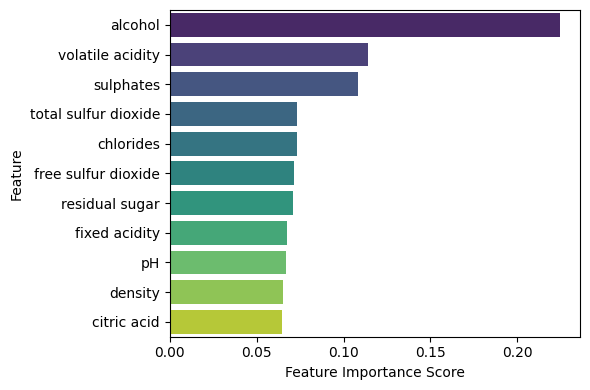

In [15]:
xgbr = best_model.named_steps['xgbr']
feature_importances = pd.DataFrame({
    'Feature': x.columns,
    'Importance': xgbr.feature_importances_
}).sort_values(by='Importance', ascending =False)

plt.figure(figsize=(6, 4))
sns.barplot(x=feature_importances['Importance'], y=feature_importances['Feature'], orient="h", palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.tight_layout()

In [16]:
explainer = shap.Explainer(xgbr, x_train)
shap_values = explainer(x_test)

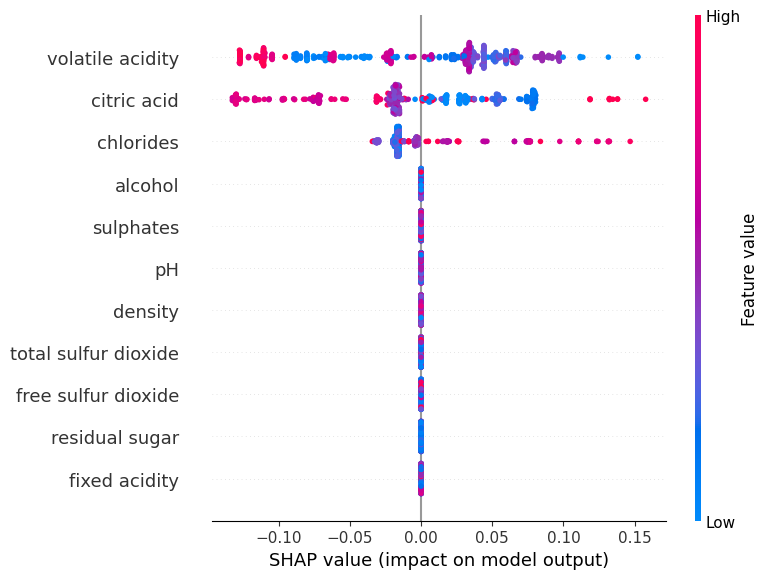

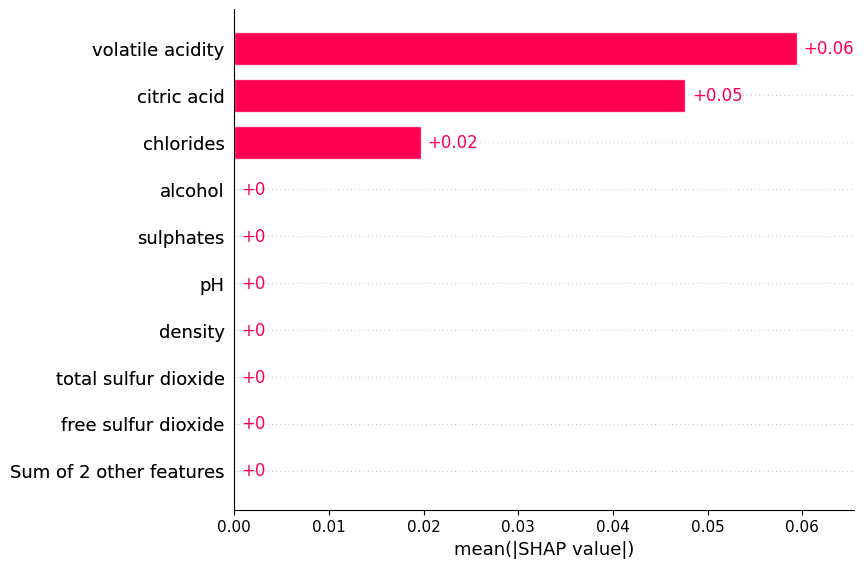

In [17]:
shap.summary_plot(shap_values, x_test, feature_names=x.columns)
shap.plots.bar(shap_values)